**Data source:** Yahoo Finance (via `yfinance`)  
**Asset universe (MVP):** SPY (S&P 500 ETF)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

START = "2010-01-01"
TICKERS = ["SPY"]

df = yf.download(TICKERS, start=START, auto_adjust=False, progress=False)
df.head()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2010-01-04,85.027931,113.330002,113.389999,111.510002,112.370003,118944600
2010-01-05,85.253044,113.629997,113.680000,112.849998,113.260002,111579900
2010-01-06,85.313065,113.709999,113.989998,113.430000,113.519997,116074400
2010-01-07,85.673203,114.190002,114.330002,113.180000,113.500000,131091100
2010-01-08,85.958305,114.570000,114.620003,113.660004,113.889999,126402800


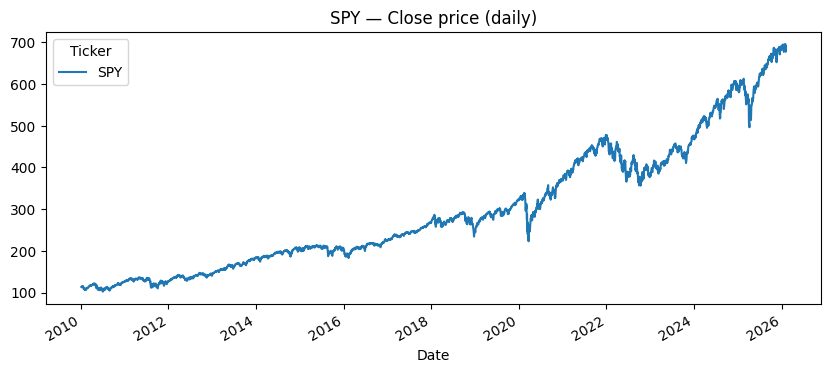

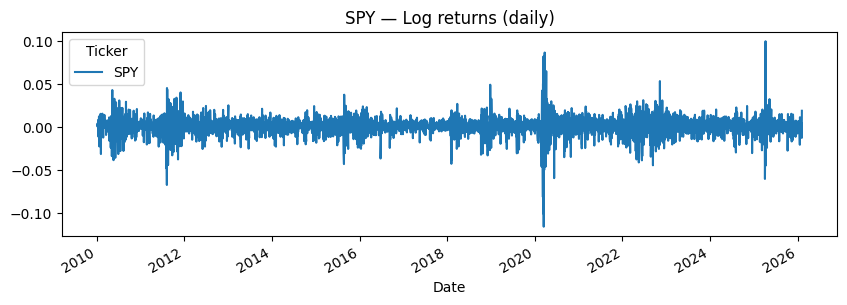

Ticker,SPY
count,4048.000000
mean,0.000446
std,0.010882
min,-0.115887
25%,-0.003784
50%,0.000652
75%,0.005746
max,0.099863


In [12]:
close = df["Close"].copy()  # si es 1 ticker, esto queda como Serie; si es lista, queda DataFrame

# asegurar DataFrame para que sea consistente
if isinstance(close, pd.Series):
    close = close.to_frame(name="SPY")

ret_log = np.log(close).diff().dropna()

close.plot(figsize=(10,4), title="SPY — Close price (daily)")
plt.show()

ret_log.plot(figsize=(10,3), title="SPY — Log returns (daily)")
plt.show()

ret_log.describe()


In [13]:
# Missing en precios
missing_close = close.isna().sum()
missing_close


Ticker
SPY    0
dtype: int64

In [14]:
# Duplicados en índice (fechas repetidas)
dups = close.index.duplicated().sum()
print("Duplicate dates:", dups)


Duplicate dates: 0


In [15]:
all_bd = pd.date_range(close.index.min(), close.index.max(), freq="B")
calendar_gaps = all_bd.difference(close.index)

print("Calendar business-day gaps (expected due to market holidays):", len(calendar_gaps))
calendar_gaps[:10]

print("Coverage ratio vs business-day calendar:", round(len(close) / len(all_bd), 4))


Calendar business-day gaps (expected due to market holidays): 151
Coverage ratio vs business-day calendar: 0.964


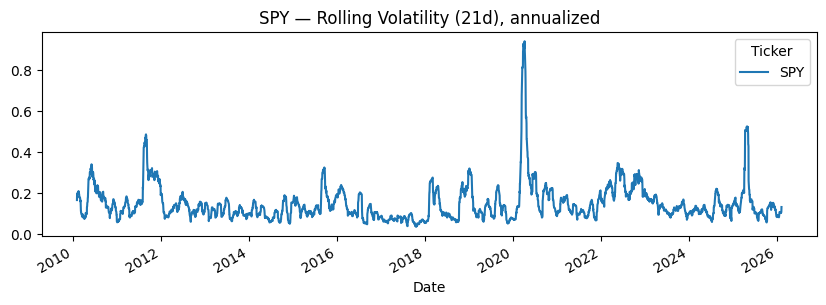

In [16]:
rolling_vol_21 = ret_log.rolling(21).std() * np.sqrt(252)  # annualized
rolling_vol_21.plot(figsize=(10,3), title="SPY — Rolling Volatility (21d), annualized")
plt.show()


## Key takeaways
- Data ingestion is successful and the pipeline standardizes the dataset for single/multi-asset use.
- Log returns are centered around zero but show volatility clustering (time-varying risk).
- Next step: implement VaR (historical & parametric) and backtesting using these returns.
